<a href="https://colab.research.google.com/github/Harshavardhannadiveedi/DataScience/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1.Data Preparation(loading dataset)
import pandas as pd
df =pd.read_csv("/content/heart_disease.csv")

In [ ]:
#2.Exploratory Data Analysis(EDA)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [ ]:
df.shape

(908, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


from the info method we came to know that there are no null values other than oldpeak in the dataset.



In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df['oldpeak'].median()

0.5

In [ ]:
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
df['oldpeak']

,oldpeak
0,2.3
1,0.0
2,0.4
3,0.0
4,1.5
...,...
903,1.5
904,3.0
905,2.5
906,0.5


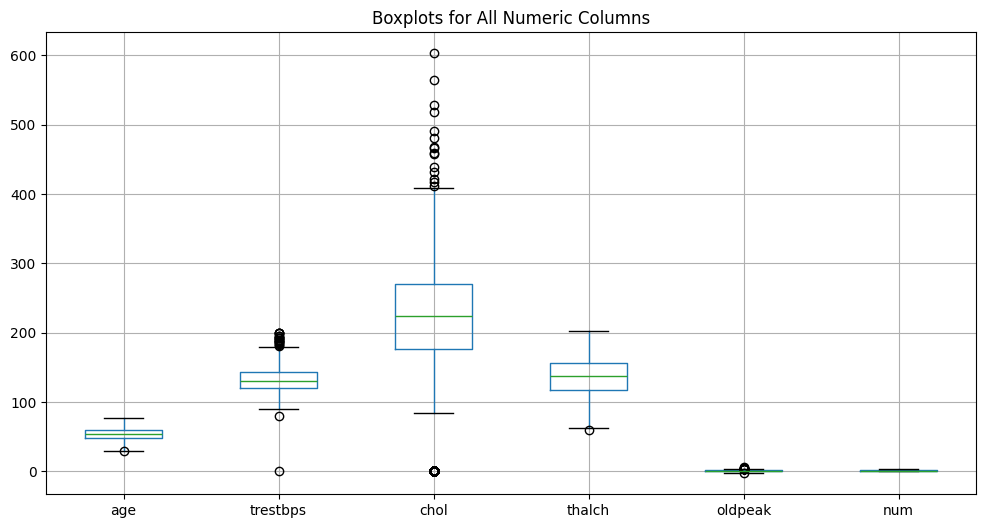

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.select_dtypes(include='number').boxplot(figsize=(12,6))
plt.title('Boxplots for All Numeric Columns')
plt.show()


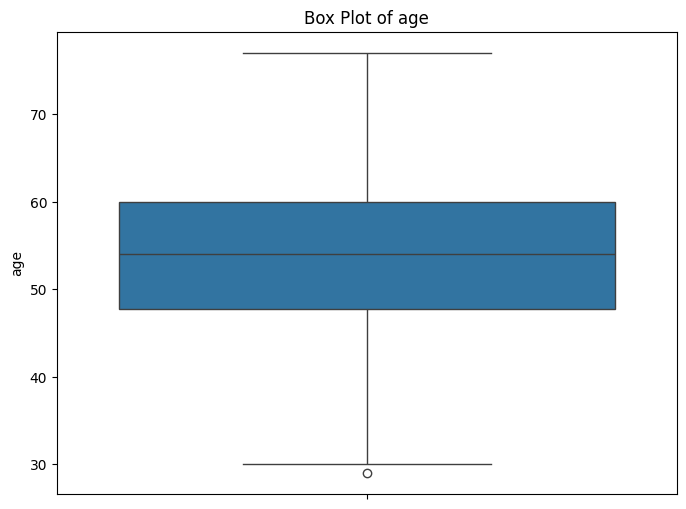

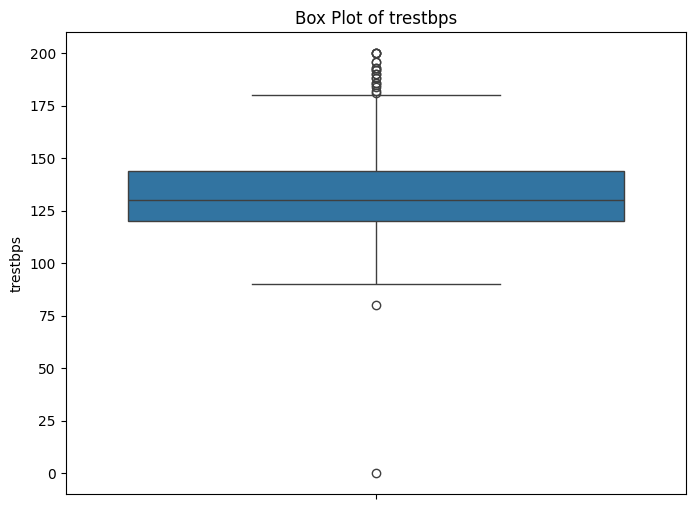

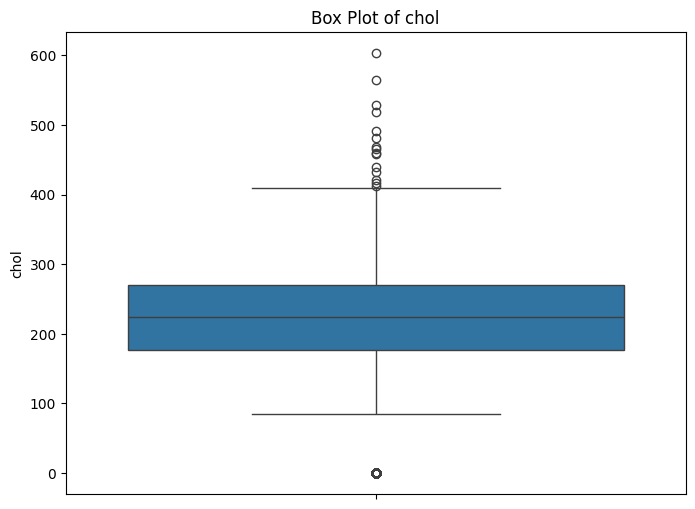

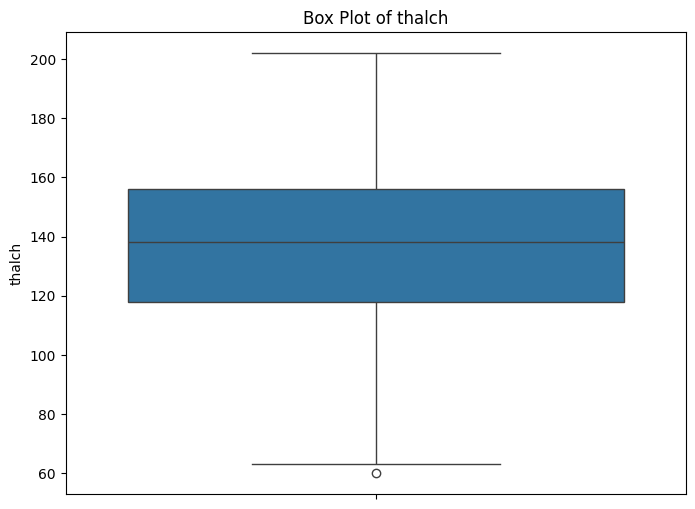

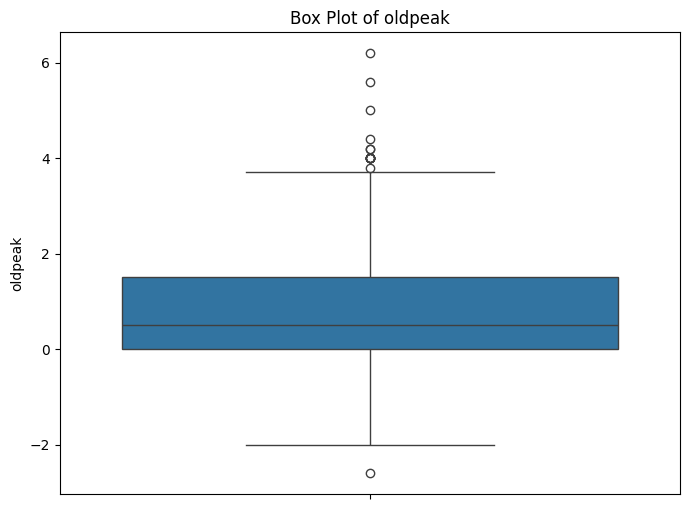

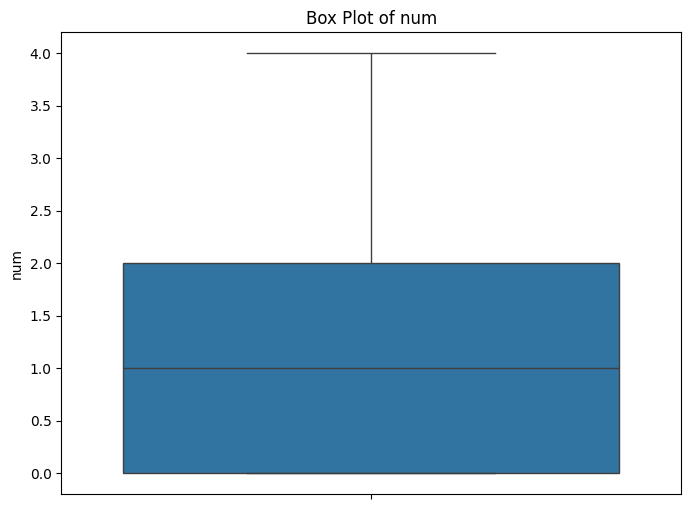

In [ ]:
# plotting boxplots for numerical columns
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [ ]:
#IQR method to all numeric features
def detect_outliers_iqr_all(df):
    outlier_summary = {}
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        total_count = len(df)

        outlier_summary[col] = {
            'outliers': outlier_count,
            'percent': round((outlier_count / total_count) * 100, 2)
        }

    return pd.DataFrame(outlier_summary).T.sort_values(by='outliers', ascending=False)
outlier_report = detect_outliers_iqr_all(df)
print(outlier_report)


          outliers  percent
chol         187.0    20.59
trestbps      22.0     2.42
oldpeak       16.0     1.76
age            1.0     0.11
thalch         1.0     0.11
num            0.0     0.00


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


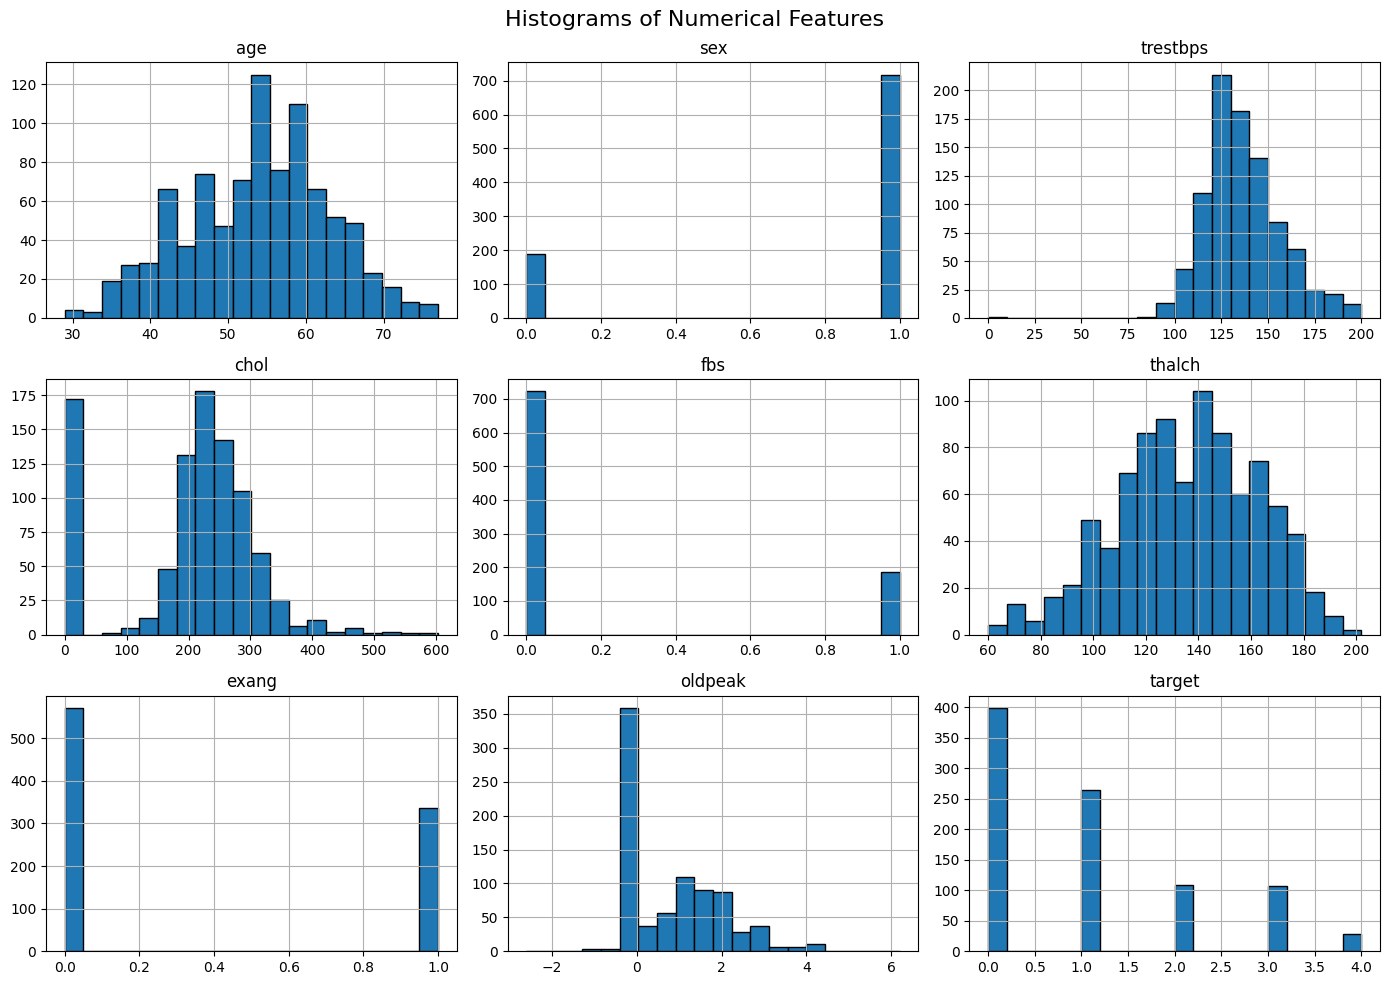

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


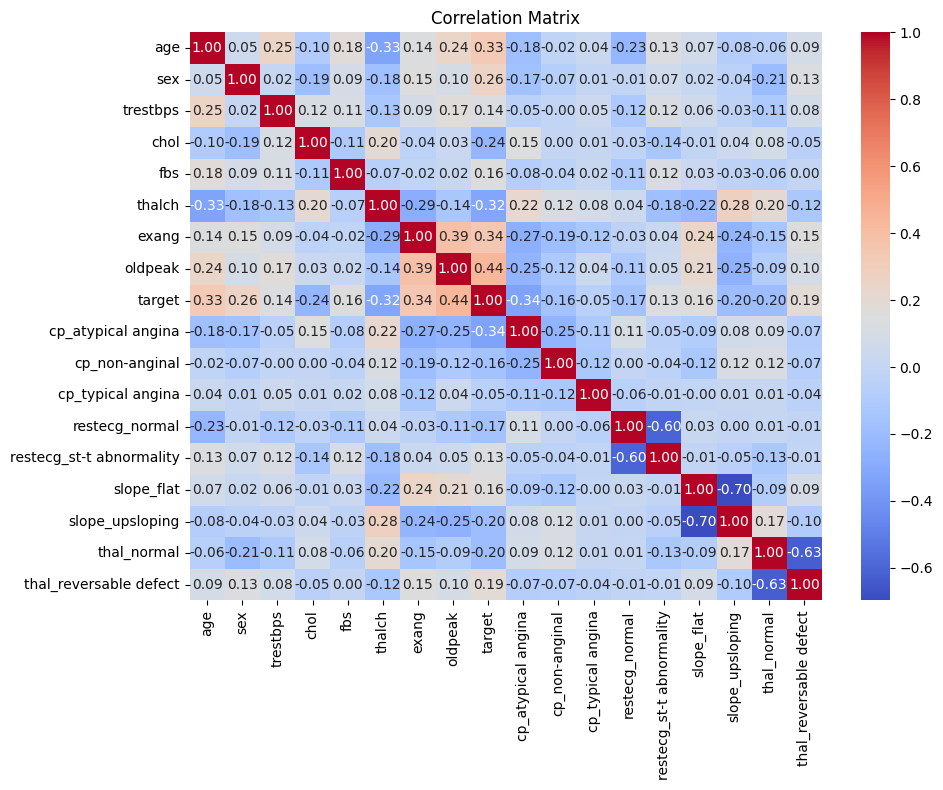

In [ ]:
import seaborn as sns

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Simple correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [ ]:
#feature engineering
# Convert binary categorical values

# Remove extra spaces and standardize to lowercase
df['sex'] = df['sex'].str.strip().str.lower()
df['fbs'] = df['fbs'].astype(str).str.strip().str.lower()
df['exang'] = df['exang'].astype(str).str.strip().str.lower()

df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['fbs'] = df['fbs'].map({'true': 1, 'false': 0})
df['exang'] = df['exang'].map({'true': 1, 'false': 0})



In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,1,lv hypertrophy,150,0.0,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,0,normal,132,0.0,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,0,normal,148,0.0,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,0,lv hypertrophy,190,0.0,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,0,normal,126,1.0,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,asymptomatic,125,0,0,normal,120,0.0,1.5,upsloping,reversable defect,4
904,62,1,asymptomatic,166,170,0,st-t abnormality,120,1.0,3.0,flat,reversable defect,4
905,56,1,non-anginal,170,0,0,lv hypertrophy,123,1.0,2.5,downsloping,normal,4
906,56,1,non-anginal,144,208,1,st-t abnormality,105,NaN,NaN,downsloping,fixed defect,4


In [ ]:
df[['sex', 'fbs', 'exang']].isnull().sum()

,0
sex,0
fbs,0
exang,36


In [ ]:
df['exang'].fillna(df['exang'].mode()[0], inplace=True)


/tmp/ipython-input-46-4185764961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exang'].fillna(df['exang'].mode()[0], inplace=True)


In [ ]:
df[['sex', 'fbs', 'exang']].isnull().sum()

,0
sex,0
fbs,0
exang,0


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,1,lv hypertrophy,150,0.0,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,0,normal,132,0.0,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,0,normal,148,0.0,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,0,lv hypertrophy,190,0.0,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,0,normal,126,1.0,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,asymptomatic,125,0,0,normal,120,0.0,1.5,upsloping,reversable defect,4
904,62,1,asymptomatic,166,170,0,st-t abnormality,120,1.0,3.0,flat,reversable defect,4
905,56,1,non-anginal,170,0,0,lv hypertrophy,123,1.0,2.5,downsloping,normal,4
906,56,1,non-anginal,144,208,1,st-t abnormality,105,0.0,NaN,downsloping,fixed defect,4


In [ ]:
#variables having more than two categories and are not ordinal, so using one-hot encoding
# Apply one-hot encoding to multi-class categorical columns
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)



In [ ]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0.0,2.3,0,False,False,True,False,False,False,False,False,False
1,41,1,135,203,0,132,0.0,0.0,0,True,False,False,True,False,True,False,False,False
2,57,1,140,192,0,148,0.0,0.4,0,False,False,False,True,False,True,False,False,False
3,52,1,118,186,0,190,0.0,0.0,0,False,False,True,False,False,True,False,False,False
4,57,1,110,201,0,126,1.0,1.5,0,False,False,False,True,False,True,False,False,False


In [ ]:
#renaming the target variable "num " with "target"  for better understanding
df.rename(columns={'num': 'target'}, inplace=True)


In [ ]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,target,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0.0,2.3,0,False,False,True,False,False,False,False,False,False
1,41,1,135,203,0,132,0.0,0.0,0,True,False,False,True,False,True,False,False,False
2,57,1,140,192,0,148,0.0,0.4,0,False,False,False,True,False,True,False,False,False
3,52,1,118,186,0,190,0.0,0.0,0,False,False,True,False,False,True,False,False,False
4,57,1,110,201,0,126,1.0,1.5,0,False,False,False,True,False,True,False,False,False


In [ ]:
#Decision tree classifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
#Implement a Decision Tree Classification model using a library like scikit-learn.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
#Train the model on the training set and evaluate its performance on the testing set using appropriate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.46703296703296704
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        89
           1       0.30      0.33      0.32        48
           2       0.25      0.23      0.24        22
           3       0.15      0.18      0.16        17
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.29      0.28      0.28       182
weighted avg       0.48      0.47      0.47       182

Confusion Matrix:
 [[61 17  7  3  1]
 [16 16  5 10  1]
 [ 1  9  5  4  3]
 [ 4  8  2  3  0]
 [ 2  3  1  0  0]]


In [ ]:
#5. Hyperparameter Tuning:
#Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different
#hyperparameters such as maximum depth, minimum samples split, and criterion.
from sklearn.model_selection import GridSearchCV

# Define grid of parameters
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize base model
dt = DecisionTreeClassifier(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [ ]:
#hyperparameters such as maximum depth, minimum samples split, and criterion.
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_best))


Tuned Accuracy: 0.5659340659340659
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.77        89
           1       0.39      0.54      0.46        48
           2       0.00      0.00      0.00        22
           3       0.22      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.26      0.30      0.28       182
weighted avg       0.47      0.57      0.51       182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


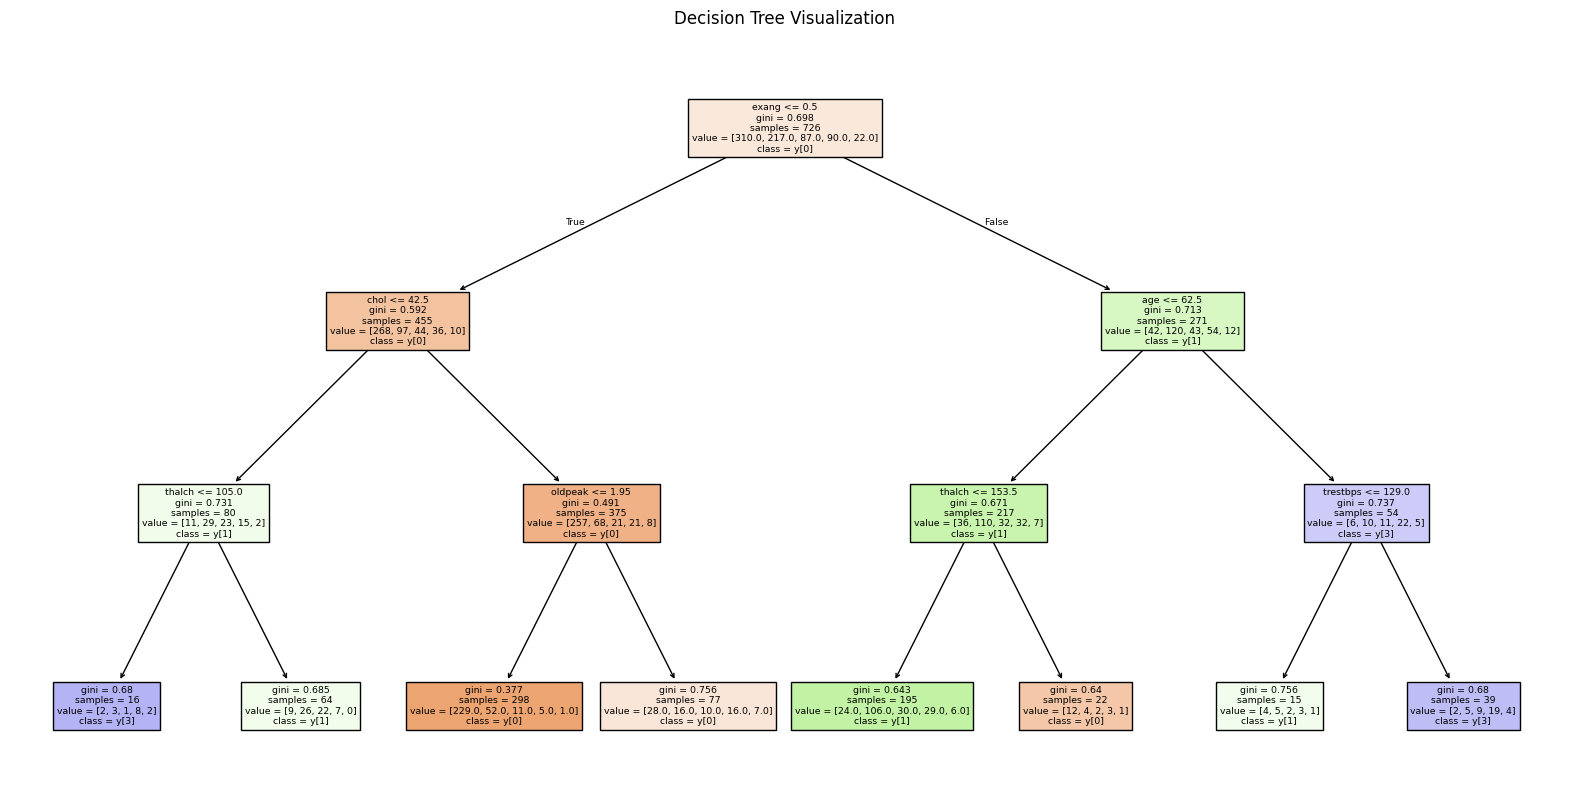

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
df['target'].value_counts(normalize=True)


,proportion
target,
0,0.439427
1,0.291850
2,0.120044
3,0.117841
4,0.030837
